In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [9]:
start = '2010-01-01'
end = '2019-12-31'
itc = yf.Ticker("ITC.NS")
print(itc.info)

{'address1': 'Virginia House', 'address2': '37 Jawaharlal Nehru Road', 'city': 'Kolkata', 'zip': '700071', 'country': 'India', 'phone': '91 33 2288 9371', 'fax': '91 33 2288 0655', 'website': 'https://www.itcportal.com', 'industry': 'Tobacco', 'industryDisp': 'Tobacco', 'sector': 'Consumer Defensive', 'sectorDisp': 'Consumer Defensive', 'longBusinessSummary': 'ITC Limited engages in the fast-moving consumer goods, hotels, paperboards and paper and packaging, agri, and information technology businesses in India and internationally. It primarily offers cigarettes and cigars; staples, spices, biscuits, confectionery and gums, snacks, noodles and pasta, beverages, dairy, ready to eat meals, chocolate, coffee, and frozen foods; personal care products; notebooks, pens and pencils, geometry boxes, erasers, sharpeners, rulers, wax and plastic crayons, sketch pens, and oil pastels; safety matches; and incense sticks under various brands. The company also operates approximately 120 hotels under 

In [10]:
df = (itc.history(period="max"))

In [11]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,3.283831,3.313415,3.273969,3.303553,985500,0.0,0.0
1996-01-02 00:00:00+05:30,3.234523,3.293691,3.129335,3.178642,7470000,0.0,0.0
1996-01-03 00:00:00+05:30,3.037297,3.108956,3.018231,3.076742,15160500,0.0,0.0
1996-01-04 00:00:00+05:30,3.076741,3.154975,3.043870,3.134594,12397500,0.0,0.0
1996-01-05 00:00:00+05:30,3.134595,3.122762,3.070168,3.078057,5008500,0.0,0.0


In [22]:
df = df.reset_index()

In [23]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1996-01-01 00:00:00+05:30,3.283831,3.313415,3.273969,3.303553,985500,0.0,0.0
1,1996-01-02 00:00:00+05:30,3.234523,3.293691,3.129335,3.178642,7470000,0.0,0.0
2,1996-01-03 00:00:00+05:30,3.037297,3.108956,3.018231,3.076742,15160500,0.0,0.0
3,1996-01-04 00:00:00+05:30,3.076741,3.154975,3.043870,3.134594,12397500,0.0,0.0
4,1996-01-05 00:00:00+05:30,3.134595,3.122762,3.070168,3.078057,5008500,0.0,0.0


In [24]:
df = df.drop(['Dividends','Stock Splits'],axis=1)

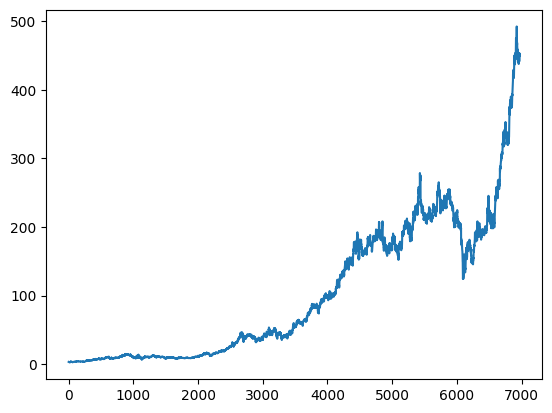

In [25]:
plt.plot(df.Close)

In [26]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
6964    447.264665
6965    447.687908
6966    448.082882
6967    448.328440
6968    448.534930
Name: Close, Length: 6969, dtype: float64

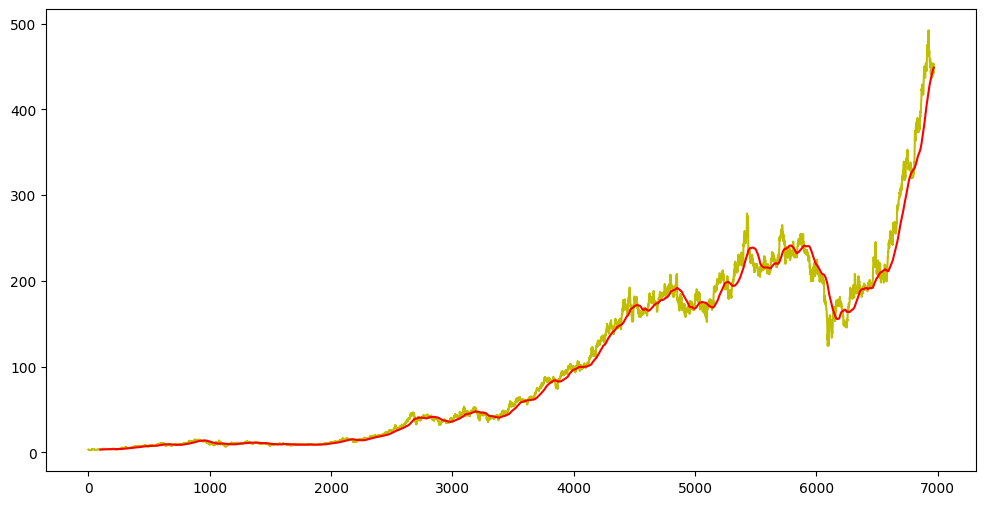

In [27]:
plt.figure(figsize = (12,6))
plt.plot(df.Close,'y')
plt.plot(ma100,'r')
#try different moving averages later on surfing through the interneti.e their formula

In [28]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
6964    402.586671
6965    403.172311
6966    403.773704
6967    404.350047
6968    404.913132
Name: Close, Length: 6969, dtype: float64

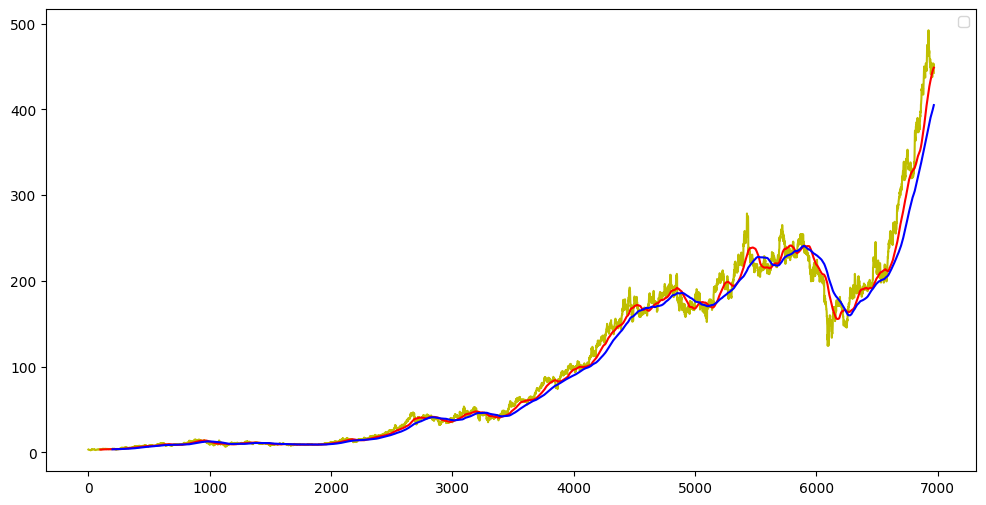

In [30]:
plt.figure(figsize = (12,6))
plt.plot(df.Close,'y')
plt.plot(ma100,'r')
plt.plot(ma200,'b')
plt.legend()

In [32]:
df.shape

(6969, 6)

In [35]:
train = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
test = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
print(train.shape)
print(test.shape)
# 70% and 30%

(4878, 1)
(2091, 1)


In [36]:
train.head()

,Close
0,3.303553
1,3.178642
2,3.076742
3,3.134594
4,3.078057


In [37]:
test.head()

,Close
4878,180.765305
4879,180.504959
4880,183.030380
4881,184.826859
4882,182.301376


In [38]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [40]:
train_arr = scaler.fit_transform(train)
train_arr
train_arr.shape

(4878, 1)

In [78]:
# first 100 days are xtrain and 101th the ytrain...till the end
x_train = []
y_train = []
for i in range(100,train_arr.shape[0]):
  x_train.append(train_arr[i - 100: i])
  y_train.append(train_arr[i,0])

x_train,y_train = np.array(x_train), np.array(y_train)

In [79]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [112]:
# here working with only one columns i.e close
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu',return_sequences= True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu',return_sequences= True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu',return_sequences= True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1)) #connects all layers

In [113]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_20 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_21 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_21 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_22 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_22 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_23 (LSTM)              (None, 120)             

In [115]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
150/150 [==============================] - 70s 426ms/step - loss: 0.0017
Epoch 2/50
150/150 [==============================] - 46s 305ms/step - loss: 0.0019
Epoch 3/50
150/150 [==============================] - 48s 321ms/step - loss: 0.0017
Epoch 4/50
150/150 [==============================] - 47s 314ms/step - loss: 0.0018
Epoch 5/50
150/150 [==============================] - 46s 304ms/step - loss: 0.0019
Epoch 6/50
150/150 [==============================] - 47s 311ms/step - loss: 0.0018
Epoch 7/50
150/150 [==============================] - 45s 302ms/step - loss: 0.0017
Epoch 8/50
150/150 [==============================] - 47s 313ms/step - loss: 0.0016
Epoch 9/50
150/150 [==============================] - 45s 302ms/step - loss: 0.0017
Epoch 10/50
150/150 [==============================] - 46s 308ms/step - loss: 0.0019
Epoch 11/50
150/150 [==============================] - 45s 300ms/step - loss: 0.0018
Epoch 12/50
150/150 [==============================] - 45s 298ms/step - lo

In [116]:
model.save('keras_BE_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [117]:
test.head()

,Close
4878,180.765305
4879,180.504959
4880,183.030380
4881,184.826859
4882,182.301376


In [118]:
# we would need the past 100 days for the 1st prediction of test
past_100_days = train.tail(100)

In [119]:
final_df = past_100_days.append(test,ignore_index = True)

<ipython-input-119-9574a4eb999e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test,ignore_index = True)


In [120]:
final_df.head()

,Close
0,192.403198
1,191.804398
2,192.246994
3,192.767715
4,192.793777


In [121]:
#scaling
ip_data = scaler.fit_transform(final_df)
ip_data

array([[0.18496871],
       [0.18334054],
       [0.18454398],
       ...,
       [0.89341267],
       [0.87859372],
       [0.8649984 ]])

In [122]:
ip_data.shape #1 column ie close

(2191, 1)

In [125]:
x_test = []
y_test=[]
for i in range(100, ip_data.shape[0]):
  x_test.append(ip_data[i-100:i])
  y_test.append(ip_data[i, 0])


In [126]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(2091, 100, 1)
(2091,)


In [127]:
#predictions
y_pred = model.predict(x_test)

66/66 [==============================] - 8s 107ms/step


In [128]:
y_pred.shape

(2091, 1)

In [94]:
y_test

array([0.15332451, 0.15261662, 0.1594834 , ..., 0.89341267, 0.87859372,
       0.8649984 ])

In [95]:
y_pred

array([[[0.23704278],
        [0.2377061 ],
        [0.23779756],
        ...,
        [0.23653871],
        [0.23655395],
        [0.2367378 ]],

       [[0.23699562],
        [0.23773764],
        [0.23784721],
        ...,
        [0.23655395],
        [0.2367378 ],
        [0.2367749 ]],

       [[0.23703048],
        [0.23778385],
        [0.23785576],
        ...,
        [0.2367378 ],
        [0.2367749 ],
        [0.23673996]],

       ...,

       [[0.2565011 ],
        [0.26021683],
        [0.26062304],
        ...,
        [0.2627552 ],
        [0.26257834],
        [0.2628523 ]],

       [[0.25734177],
        [0.26023588],
        [0.26084587],
        ...,
        [0.26257834],
        [0.2628523 ],
        [0.2629675 ]],

       [[0.257245  ],
        [0.2604484 ],
        [0.2606659 ],
        ...,
        [0.2628523 ],
        [0.2629675 ],
        [0.2625346 ]]], dtype=float32)

In [ ]:
#scale up
scaler.scale_


In [129]:
#scaling up the factor by multiplying it

scale_factor = 1/0.00271907
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

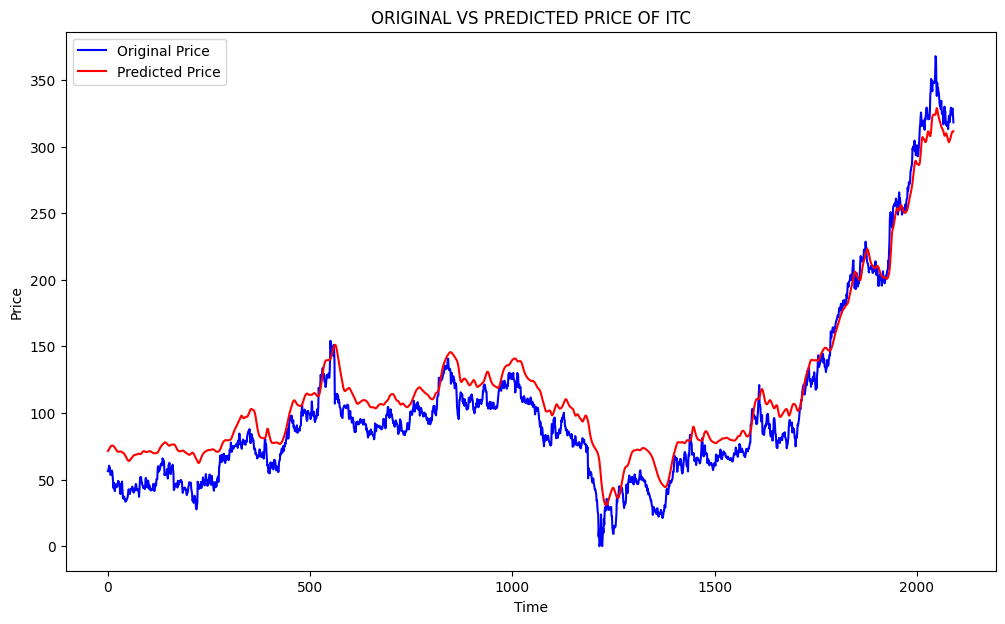

In [133]:
plt.figure(figsize=(12,7))
plt.plot(y_test,'p', label = 'Original Price')
plt.plot(y_pred,'g', label = 'Predicted Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("ORIGINAL VS PREDICTED PRICE OF ITC")
plt.legend()
plt.show()
